1.

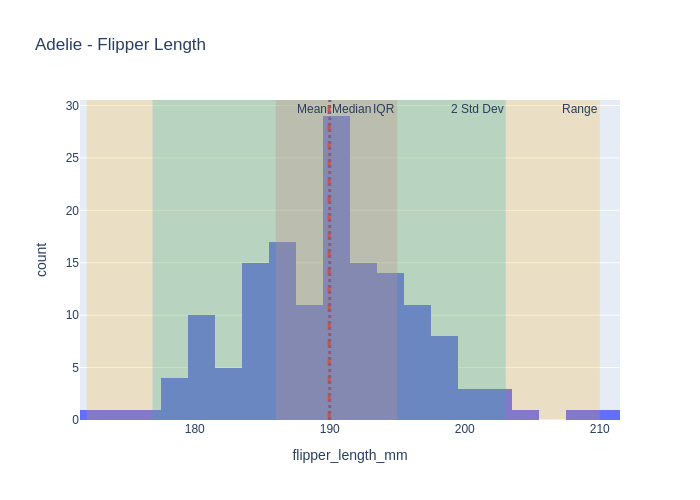

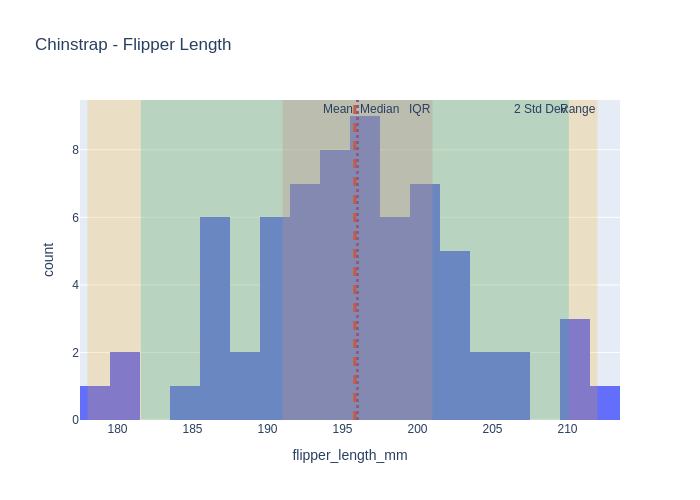

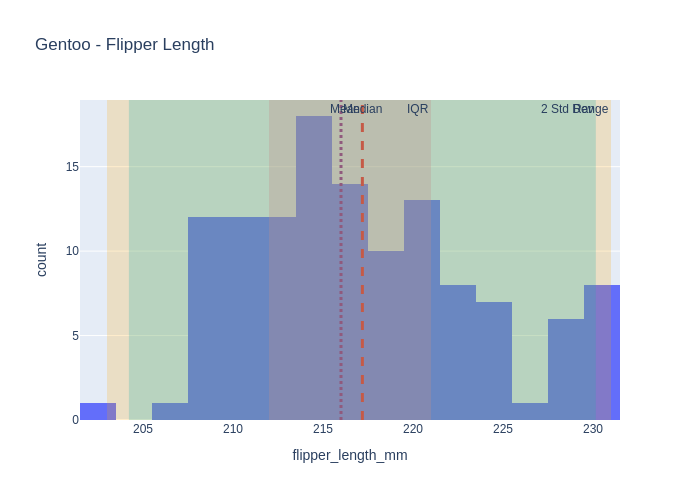

In [5]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

# Step 1.1: Remove rows with missing flipper_length_mm
df = df.dropna(subset=['flipper_length_mm'])

# Step 2: Create histograms by species
species_list = df['species'].unique()
for species in species_list:
    species_df = df[df['species'] == species]
    
    # Step 3: Calculate the required statistics
    mean = species_df['flipper_length_mm'].mean()
    median = species_df['flipper_length_mm'].median()
    flipper_min = species_df['flipper_length_mm'].min()
    flipper_max = species_df['flipper_length_mm'].max()
    q1 = species_df['flipper_length_mm'].quantile(0.25)
    q3 = species_df['flipper_length_mm'].quantile(0.75)
    std_dev = species_df['flipper_length_mm'].std()
    
    # Step 4: Create the histogram
    fig = px.histogram(species_df, x='flipper_length_mm', nbins=20, title=f'{species} - Flipper Length')
    
    # Step 5: Add vertical lines for mean and median with brighter colors
    fig.add_vline(x=mean, line=dict(color='red', width=3, dash='dash'), annotation_text='Mean', annotation_position="top left")
    fig.add_vline(x=median, line=dict(color='purple', width=3, dash='dot'), annotation_text='Median', annotation_position="top right")
    
    # Step 6: Add vertical rectangles for range, IQR, and 2*std_dev range with more visible colors
    # Full range
    fig.add_vrect(x0=flipper_min, x1=flipper_max, line_width=0, fillcolor="orange", opacity=0.2, annotation_text="Range")

    # Interquartile range
    fig.add_vrect(x0=q1, x1=q3, line_width=0, fillcolor="lightcoral", opacity=0.3, annotation_text="IQR")

    # Two standard deviations away from the mean
    fig.add_vrect(x0=mean - 2*std_dev, x1=mean + 2*std_dev, line_width=0, fillcolor="lightseagreen", opacity=0.25, annotation_text="2 Std Dev")

    # Show the plot
    fig.show(renderer="png")


2.

TypeError: show() got an unexpected keyword argument 'renderer'

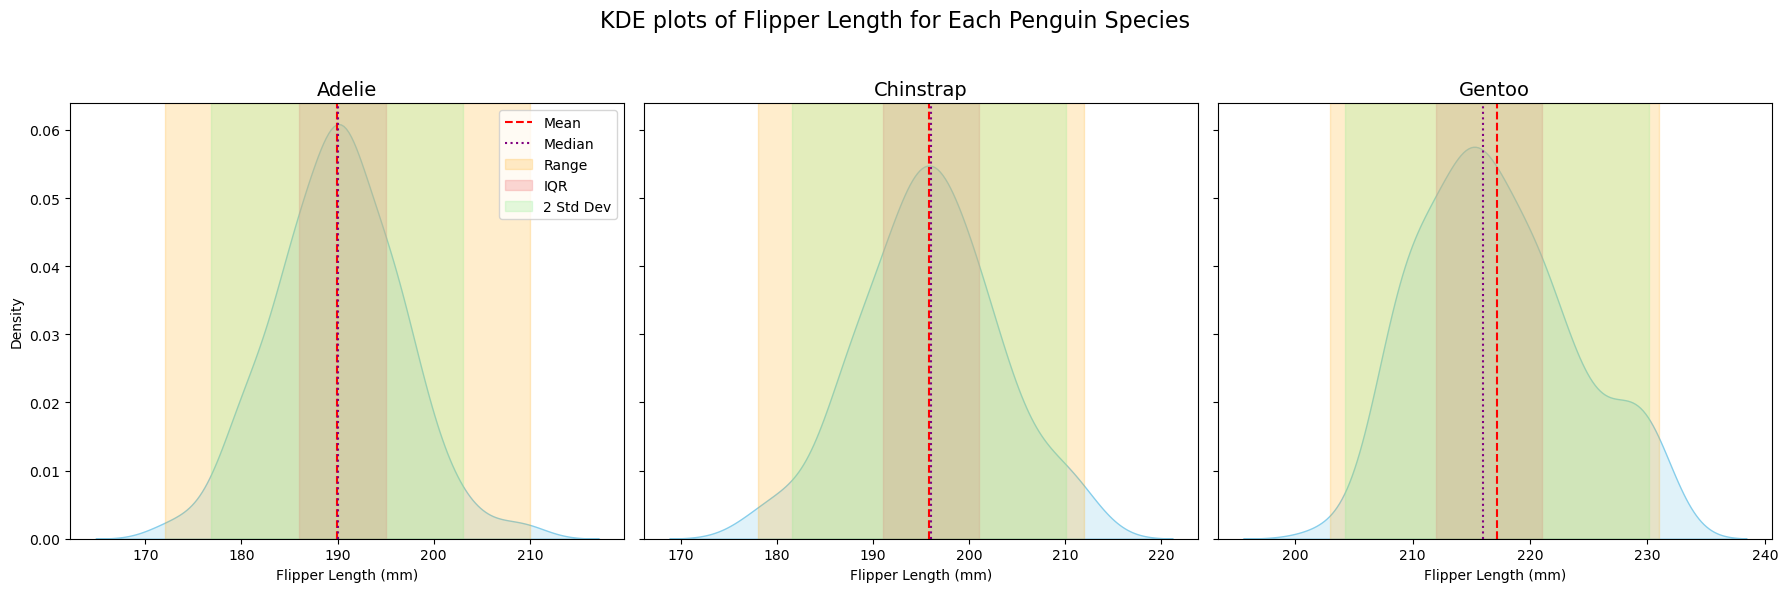

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

# Step 1.1: Remove rows with missing flipper_length_mm
df = df.dropna(subset=['flipper_length_mm'])

# Step 2: Create subplots for three species in one row
species_list = df['species'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle("KDE plots of Flipper Length for Each Penguin Species", fontsize=16)

# Step 3: Plot KDE for each species
for i, species in enumerate(species_list):
    species_df = df[df['species'] == species]
    
    # Step 3.1: Calculate statistics
    mean = species_df['flipper_length_mm'].mean()
    median = species_df['flipper_length_mm'].median()
    flipper_min = species_df['flipper_length_mm'].min()
    flipper_max = species_df['flipper_length_mm'].max()
    q1 = species_df['flipper_length_mm'].quantile(0.25)
    q3 = species_df['flipper_length_mm'].quantile(0.75)
    std_dev = species_df['flipper_length_mm'].std()
    
    # Step 3.2: Plot KDE
    sns.kdeplot(species_df['flipper_length_mm'], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(f'{species}', fontsize=14)
    axes[i].set_xlabel('Flipper Length (mm)')
    
    # Step 4: Add vertical lines for mean and median
    axes[i].axvline(mean, color='red', linestyle='--', label='Mean')
    axes[i].axvline(median, color='purple', linestyle=':', label='Median')
    
    # Step 5: Shade the areas for range, IQR, and 2 standard deviations
    # Full range
    axes[i].axvspan(flipper_min, flipper_max, color='orange', alpha=0.2, label='Range')
    
    # Interquartile range (IQR)
    axes[i].axvspan(q1, q3, color='lightcoral', alpha=0.3, label='IQR')
    
    # Two standard deviations around the mean
    axes[i].axvspan(mean - 2*std_dev, mean + 2*std_dev, color='lightgreen', alpha=0.25, label='2 Std Dev')

    # Step 6: Add legends
    if i == 0:  # Only add the legend to the first plot
        axes[i].legend()

# Step 7: Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show(renderer="png")

3. 
description: I believe the contrasting descriptions would be that: histograms show the distribution very numerically where we can the specific values within each bin, while in box plots, many of the specifics are condensed in a simpler way, it gives a much more comparable way to show data and can be put beside other box plots very conveniently. Kernel density estimation is similar to a histogram although it has a smooth curve, this lets us easily see the shape of the data and lets us predict the shape of the data if we were to either shrink the bins or add more to the population.

pros and cons:
Histogram
Pros:
-Easy to interpret and provides exact counts or proportions.
-Shows frequency distribution clearly.
-Flexible binning lets you control the granularity of data representation.
Cons:
-Choice of bin width can significantly affect the visualization (too many or too few bins might obscure insights).
-Can look choppy or disconnected compared to smoother methods.
Box Plot
Pros:
-Summarizes the distribution in a very concise manner.
-Excellent for comparing multiple groups side-by-side.
-Clearly shows outliers and central tendency (median) along with spread (IQR).
Cons:
-Doesn't show detailed distribution within quartiles (e.g., you can't see if the data is multimodal).
-Outliers might not reflect the true density of the bulk of the data points.
-It can oversimplify more complex data distributions.
Kernel Density Estimation (KDE)
Pros:
-Gives a smooth and continuous estimate of the data distribution.
-Allows for a clear understanding of data shape and density without the arbitrary division of bins.
-Ideal for visualizing underlying trends or patterns in data.
Cons:
-Can be sensitive to the choice of bandwidth (similar to how histograms are sensitive to bin width).
-Provides a smoothed estimate, so it can hide outliers or small spikes in data.
-Doesn't show exact frequencies, which might be necessary in some cases.

My Preference: In my opinion, I would prefer just to use histograms, as its very clear with the way it presents data. Using histograms I could already get a good idea of the shape of the distribution so KDE plots are not necessary to me. Although, if im trying to compare different plots, box plots are much more reliable and simple to use since I could stack them side by side to show the key statistics.

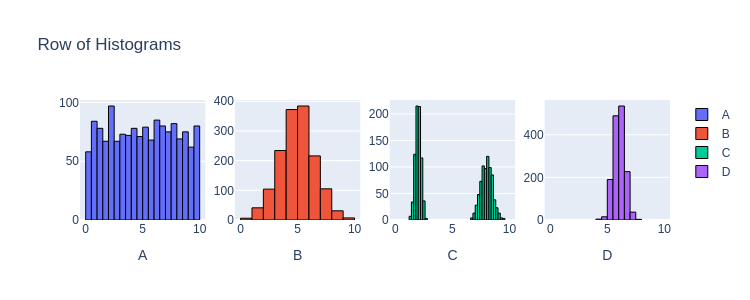

In [15]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

4.
(1) C and D
(2) B and D
(3) A and D
(4) A and C

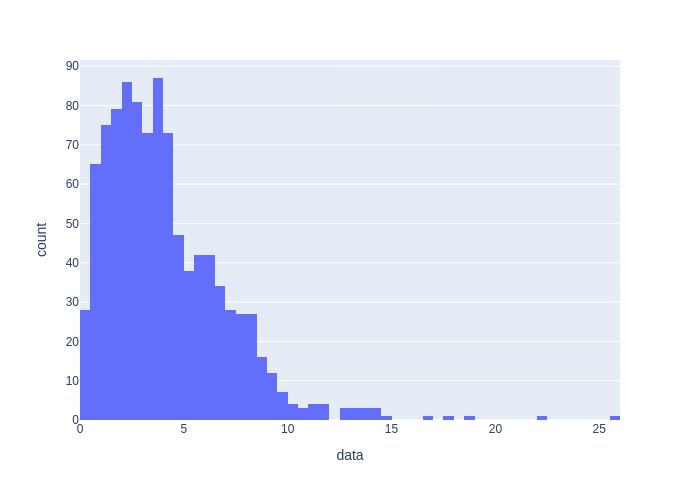

In [16]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig1.show(renderer="png")

5. the mean and median are both ways to find a 'center' number that can give an idea of the rest of the numbers. the mean is calculated by adding all the values and then dividing by the number of values added and the median is the middle number when all the numbers are lined up from least to greatest. right and left skewness is when the distribution of data is asymmetrical and this causes the mean and median to differ. in a right skew where the 'tail' is longer on the right side, the mean will be greater than the median, in a left skew the median will be greater than the mean.

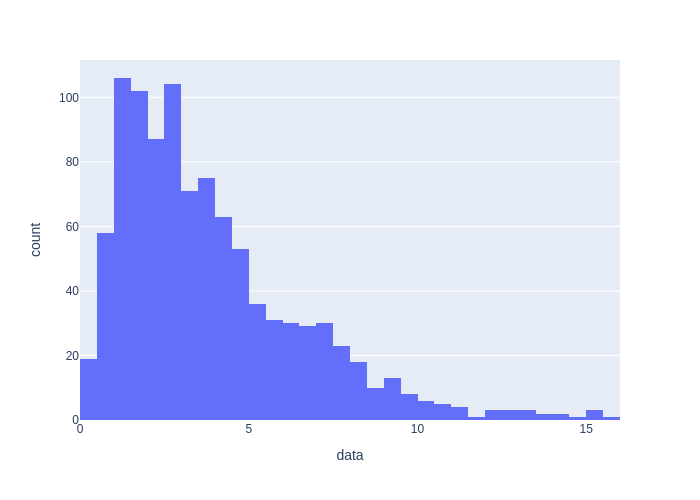

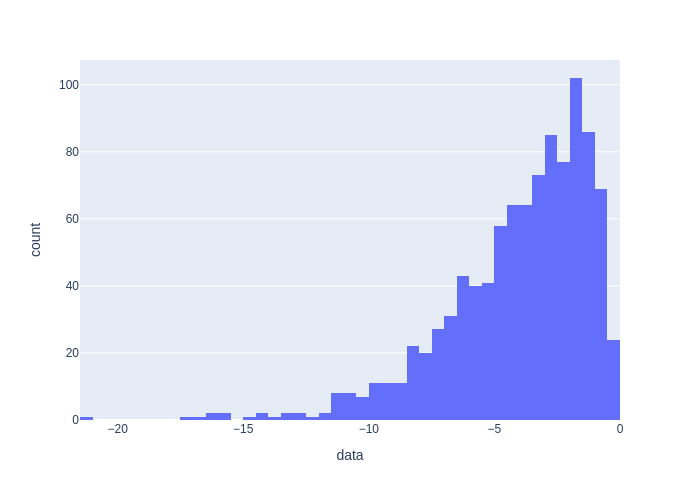

In [17]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")

fig1.show(renderer="png")
fig2.show(renderer="png")

6.

In [18]:
import pandas as pd
import numpy as np
import plotly.express as px
data = pd.read_csv("https://gist.githubusercontent.com/bootshine2/ba15d3cb38e2ed31129aeca403405a12/raw/10949901cd8a6a75aa46c86b804c42ff410f929e/Bee%2520Colony%2520Loss.csv")
data

,Year,Season,State,Total Annual Loss,Beekeepers,Beekeepers Exclusive to State,Colonies,Colonies Exclusive to State
0,2010/11,Annual,Alabama,13.90%,21,90.50%,459,96.10%
1,2011/12,Annual,Alabama,27.00%,25,96.00%,582,99.70%
2,2012/13,Annual,Alabama,55.10%,36,94.40%,777,63.70%
3,2013/14,Annual,Alabama,44.30%,33,93.90%,1083,38.60%
4,2014/15,Annual,Alabama,48.00%,28,96.40%,504,98.50%
...,...,...,...,...,...,...,...,...
360,2012/13,Annual,Wyoming,46.40%,13,53.90%,19318,0.70%
361,2013/14,Annual,Wyoming,20.10%,10,40.00%,22954,0.10%
362,2014/15,Annual,Wyoming,32.50%,11,63.60%,18200,0.20%
363,2015/16,Annual,Wyoming,38.30%,26,69.20%,26403,1.90%


In [19]:
data.shape

(365, 8)

In [20]:
data.describe()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Year                            365 non-null    object
 1   Season                          365 non-null    object
 2    State                          365 non-null    object
 3    Total Annual Loss              349 non-null    object
 4    Beekeepers                     365 non-null    int64 
 5    Beekeepers Exclusive to State  365 non-null    object
 6    Colonies                       365 non-null    int64 
 7    Colonies Exclusive to State    365 non-null    object
dtypes: int64(2), object(6)
memory usage: 22.9+ KB


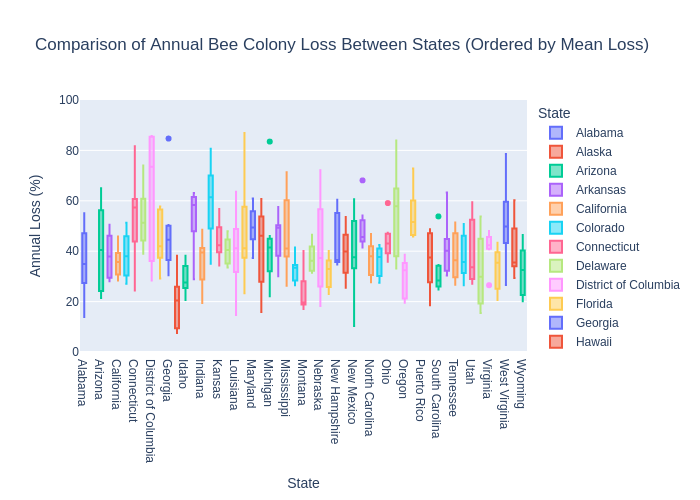

In [45]:
import pandas as pd
import plotly.express as px

# Load the dataset
url = "https://gist.githubusercontent.com/bootshine2/ba15d3cb38e2ed31129aeca403405a12/raw/10949901cd8a6a75aa46c86b804c42ff410f929e/Bee%2520Colony%2520Loss.csv"
data = pd.read_csv(url)

# Clean column names by stripping leading/trailing spaces
data.columns = data.columns.str.strip()

# Remove percentage symbols and convert the 'Total Annual Loss' column to numeric
data['Total Annual Loss'] = data['Total Annual Loss'].str.rstrip('%').astype(float)

# Calculate the mean annual loss for each state
state_means = data.groupby('State')['Total Annual Loss'].mean().sort_values(ascending=False)

# Create a categorical type for the State column, ordering by the computed means
data['State'] = pd.Categorical(data['State'], categories=state_means.index, ordered=True)

# Create box plots comparing annual loss between states
fig = px.box(data, 
             x='State', 
             y='Total Annual Loss', 
             title='Comparison of Annual Bee Colony Loss Between States (Ordered by Mean Loss)',
             labels={'Total Annual Loss': 'Annual Loss (%)', 'State': 'State'},
             color='State')

# Set y-axis range from 0% to 100%
fig.update_layout(yaxis=dict(range=[0, 100], title='Annual Loss (%)'))

# Render as PNG
fig.show(renderer="png")


In [59]:
import pandas as pd
import plotly.express as px
import numpy as np
from scipy.stats import gaussian_kde
import plotly.graph_objects as go

# Load the dataset
url = "https://gist.githubusercontent.com/bootshine2/ba15d3cb38e2ed31129aeca403405a12/raw/10949901cd8a6a75aa46c86b804c42ff410f929e/Bee%2520Colony%2520Loss.csv"
data = pd.read_csv(url)

# Trim leading spaces from column names
data.columns = data.columns.str.strip()

# Convert 'Total Annual Loss' to numeric by removing the percentage sign and converting to float
data['Total Annual Loss'] = data['Total Annual Loss'].str.replace('%', '').astype(float)

# Drop any rows with NaN or infinite values
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Filter to keep only the top 5 states based on average total loss
top_states = data.groupby('State')['Total Annual Loss'].mean().nlargest(5).index
filtered_data = data[data['State'].isin(top_states)]

# Create a histogram figure with smaller bins
fig = px.histogram(filtered_data, x='Total Annual Loss', color='State', 
                   title='KDE of Bee Colony Loss by State',
                   histnorm='probability density', 
                   marginal='rug', 
                   opacity=0.5, 
                   barmode='overlay',
                   nbins=20)  # Adjust the number of bins as needed

# Compute the KDE for each state and add to the plot
x = np.linspace(0, filtered_data['Total Annual Loss'].max(), 100)
for state in top_states:
    subset = filtered_data[filtered_data['State'] == state]['Total Annual Loss']
    kde = gaussian_kde(subset)
    # Create a scatter object for the KDE line
    fig.add_trace(go.Scatter(x=x, y=kde(x), mode='lines', name=f'{state} KDE'))

# Show the figure
fig.show(renderer="png")


7.

import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [ ]:
8.

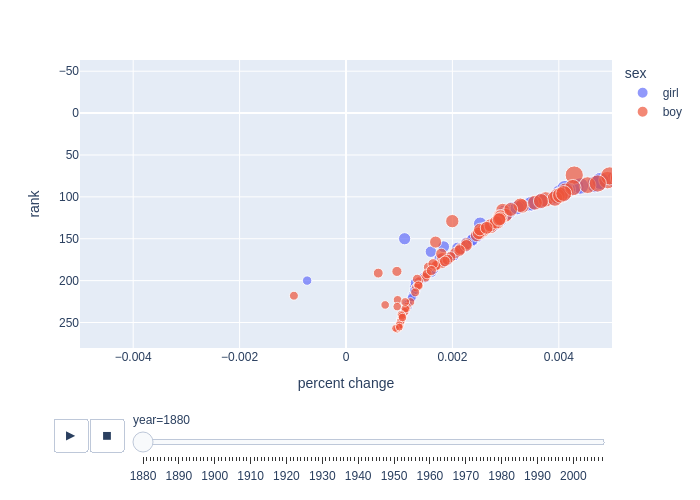

In [73]:
import plotly.express as px
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')



bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
           size="percent", color="sex", hover_name="name",
           size_max=50, range_x=[-0.005,0.005])
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


9. somewhat